In [1]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt


In [2]:
with Path("../18.in").open() as f:
    data = f.read().splitlines()

In [3]:
testdata = """\
R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)""".splitlines()

In [48]:
testdata2 = """\
R 7 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
U 3 (#d2c081)
L 3 (#59c680)
D 1 (#411b91)
L 2 (#8ceee2)
U 3 (#caa173)""".splitlines()

In [49]:
def parse(data):
    instructions = []
    for line in data:
        direction, steps, color = line.split()
        steps = int(steps)
        color = color[2:-1]  # strip brackets and hash
        color = [int(color[i:i+2], 16) for i in (0, 2, 4)]
        instructions.append((direction, steps, color))
    return instructions

parse(testdata)

[('R', 6, [112, 199, 16]),
 ('D', 5, [13, 197, 113]),
 ('L', 2, [87, 19, 240]),
 ('D', 2, [210, 192, 129]),
 ('R', 2, [89, 198, 128]),
 ('D', 2, [65, 27, 145]),
 ('L', 5, [140, 238, 226]),
 ('U', 2, [202, 161, 115]),
 ('L', 1, [27, 88, 162]),
 ('U', 2, [202, 161, 113]),
 ('R', 2, [120, 7, 210]),
 ('U', 3, [167, 127, 163]),
 ('L', 2, [1, 82, 50]),
 ('U', 2, [122, 33, 227])]

In [50]:
def get_shape(instructions):
    y = x = 0

    xs = []
    ys = []

    for direction, steps, _ in instructions:
        if direction == "D":
            y += steps
        elif direction == "U":
            y -= steps
        elif direction == "R":
            x += steps
        elif direction == "L":
            x -= steps

        xs.append(x)
        ys.append(y)

    return max(ys) + 1, max(xs) + 1, 3


direction_to_vector = {
    "U": np.array([-1, 0]),
    "D": np.array([1, 0]),
    "L": np.array([0, -1]),
    "R": np.array([0, 1])
}

In [51]:
# def dig_trench(instructions):
#     image = np.zeros(get_shape(instructions), dtype=int)

#     print(image.shape)

#     pos = np.array([0, 0])
#     for direction, steps, color in instructions:
#         vec = direction_to_vector[direction]
#         for _ in range(steps):
#             pos += vec
#             image[pos[0], pos[1]] = color

#     # Line by line, find the trenches and flip the inside/outside state
#     lagoon_mask = np.zeros(image.shape[:2], dtype=bool)
#     for i in range(image.shape[0]):
#         is_inside = False
#         previous_check = False
#         previous_color = np.array([-1, -1, -1])
#         for j in range(image.shape[1]):
#             # if we hit a trench flip the inside/outside state
#             current_is_trench = image[i, j].any()
#             if current_is_trench:
#                 if previous_check:
#                     # still inside of a trench

#                     pass
#                     # if np.array_equal(image[i, j], previous_color):
#                     #     # we are still inside the same trench
#                     #     pass
#                     # else:
#                     #     # we are in a different trench
#                     #     # flip the inside/outside state
#                     #     is_inside = not is_inside
#                     #     previous_check = False
#                     #     previous_color = np.array([-1, -1, -1])
#                 else:
#                     is_inside = not is_inside
#                     previous_check = True
#                     previous_color = image[i, j]
#             else:
#                 previous_check = False
#                 previous_color = np.array([-1, -1, -1])

#             lagoon_mask[i, j] = is_inside or current_is_trench

#     return image, lagoon_mask, np.count_nonzero(lagoon_mask)


In [127]:

def dig_trench(instructions):
    image = np.zeros(get_shape(instructions), dtype=int)

    print(image.shape)

    pos = np.array([0, 0])
    for direction, steps, color in instructions:
        vec = direction_to_vector[direction]
        for _ in range(steps):
            pos += vec
            image[pos[0], pos[1]] = color

    # Line by line, find the trenches and flip the inside/outside state
    lagoon_mask = np.zeros(image.shape[:2], dtype=bool)
    for i in range(image.shape[0]):
        is_inside = False
        prev_was_trench = False

        for j in range(image.shape[1]):

            curr_is_trench = image[i, j].any()

            if prev_was_trench and not curr_is_trench:
                is_inside = not is_inside

            lagoon_mask[i, j] = is_inside and not curr_is_trench

            prev_was_trench = curr_is_trench


    # Extend the mask with the trenches themselves
    # lagoon_mask = np.logical_or(lagoon_mask, np.where(image.any(axis=2), True, False))

    return image, lagoon_mask, np.count_nonzero(lagoon_mask)



def solve1(data, visualize=True):
    trench_image, lagoon_mask, nonzero = dig_trench(parse(data))

    if visualize:
        plt.figure(figsize=(25, 25))
        plt.subplot(1, 2, 1)
        plt.title("Trench")
        plt.imshow(trench_image)
        # plt.imshow(np.where(trench_image.any(axis=2), 1, 0))
        plt.subplot(1, 2, 2)
        plt.title(f"Lagoon with {nonzero} m^2")
        plt.imshow(lagoon_mask)
        plt.show()

    return nonzero

# assert solve1(testdata) == 62

(10, 7, 3)


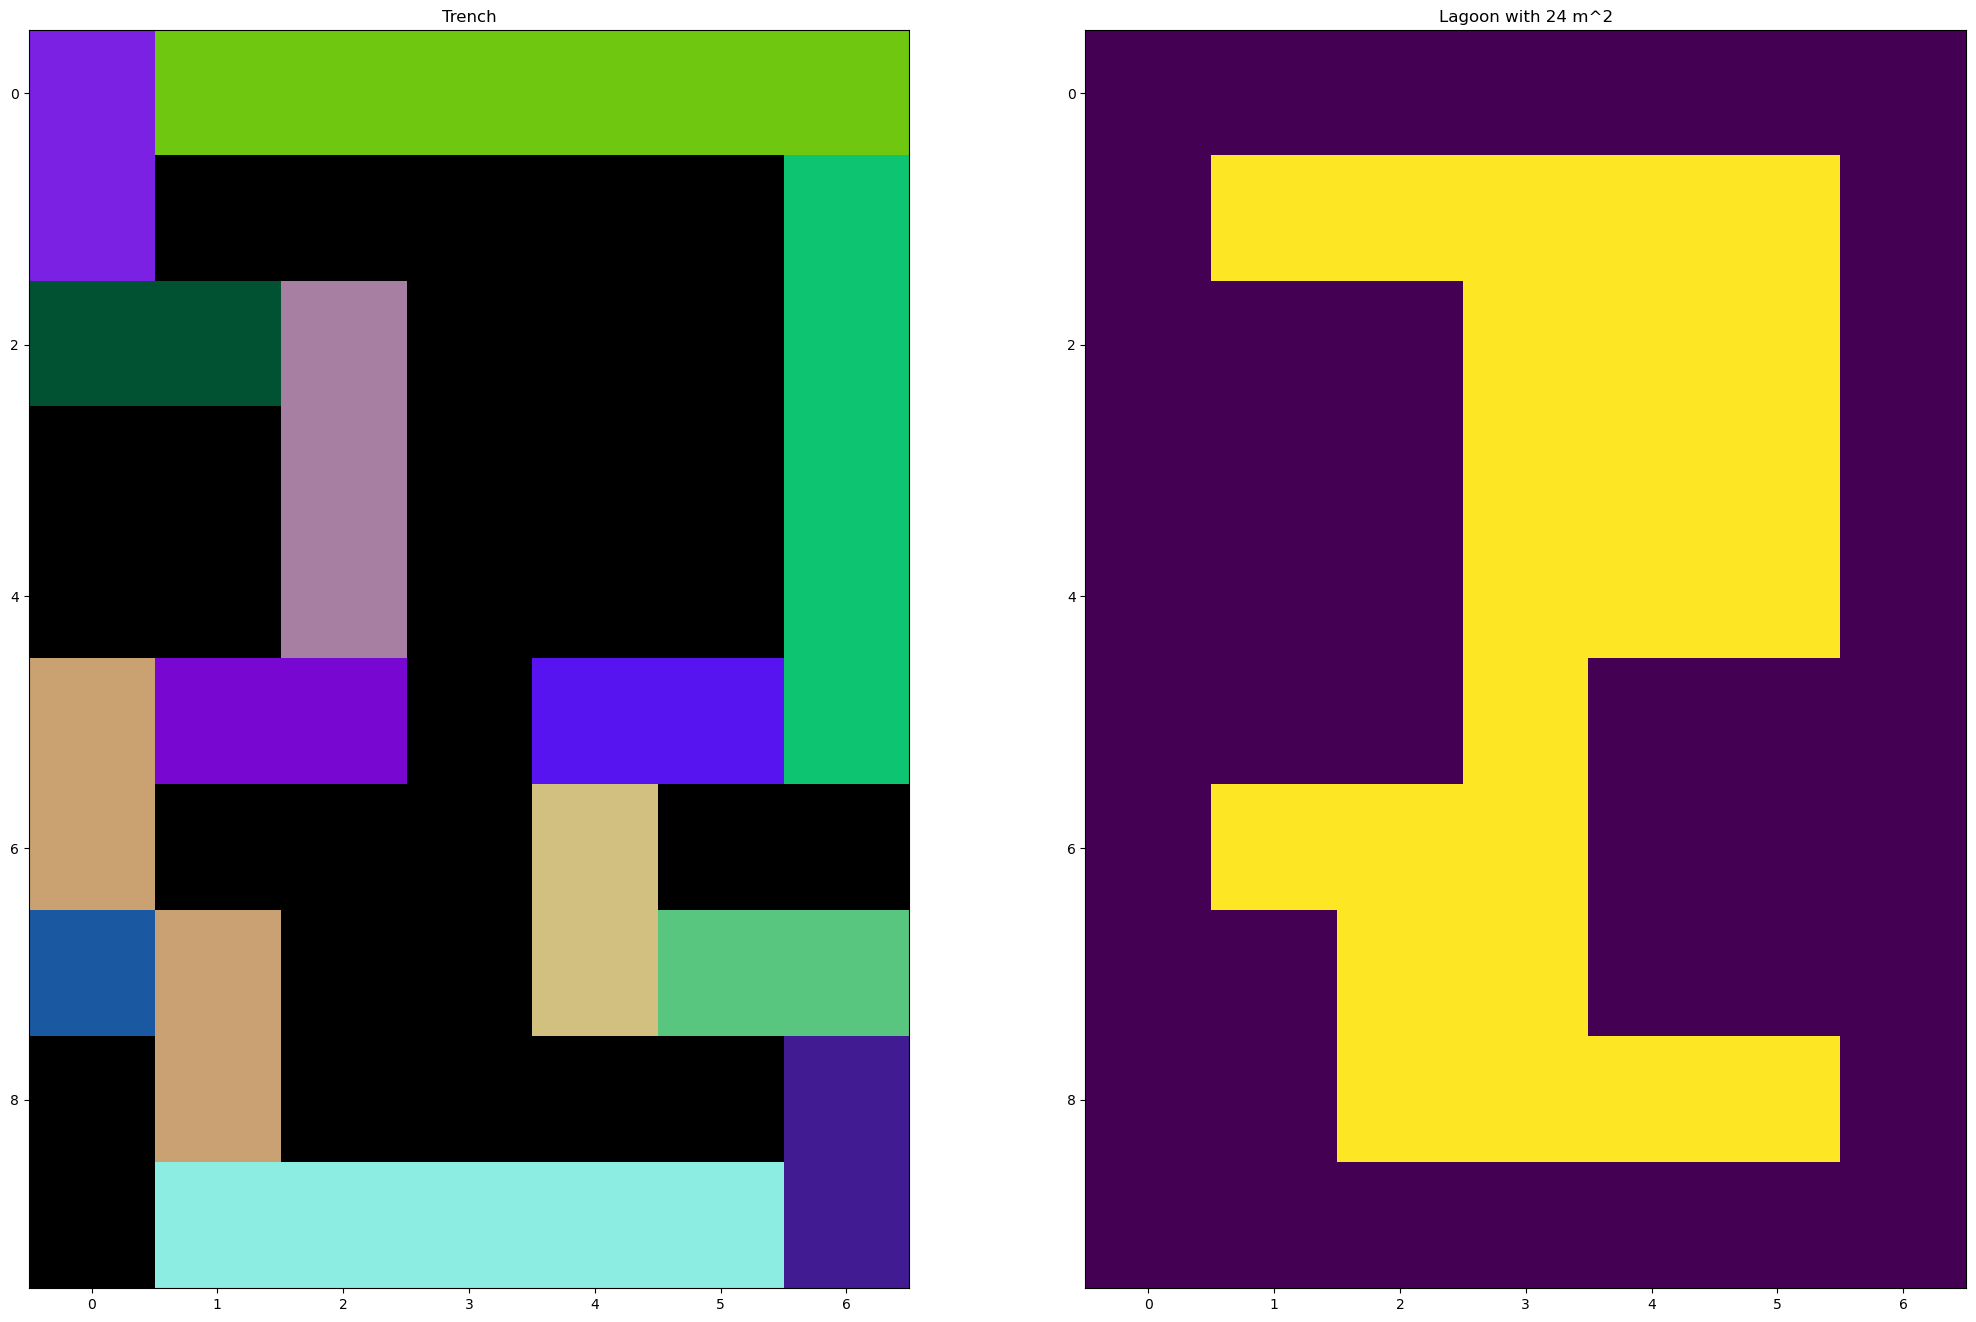

(6, 8, 3)


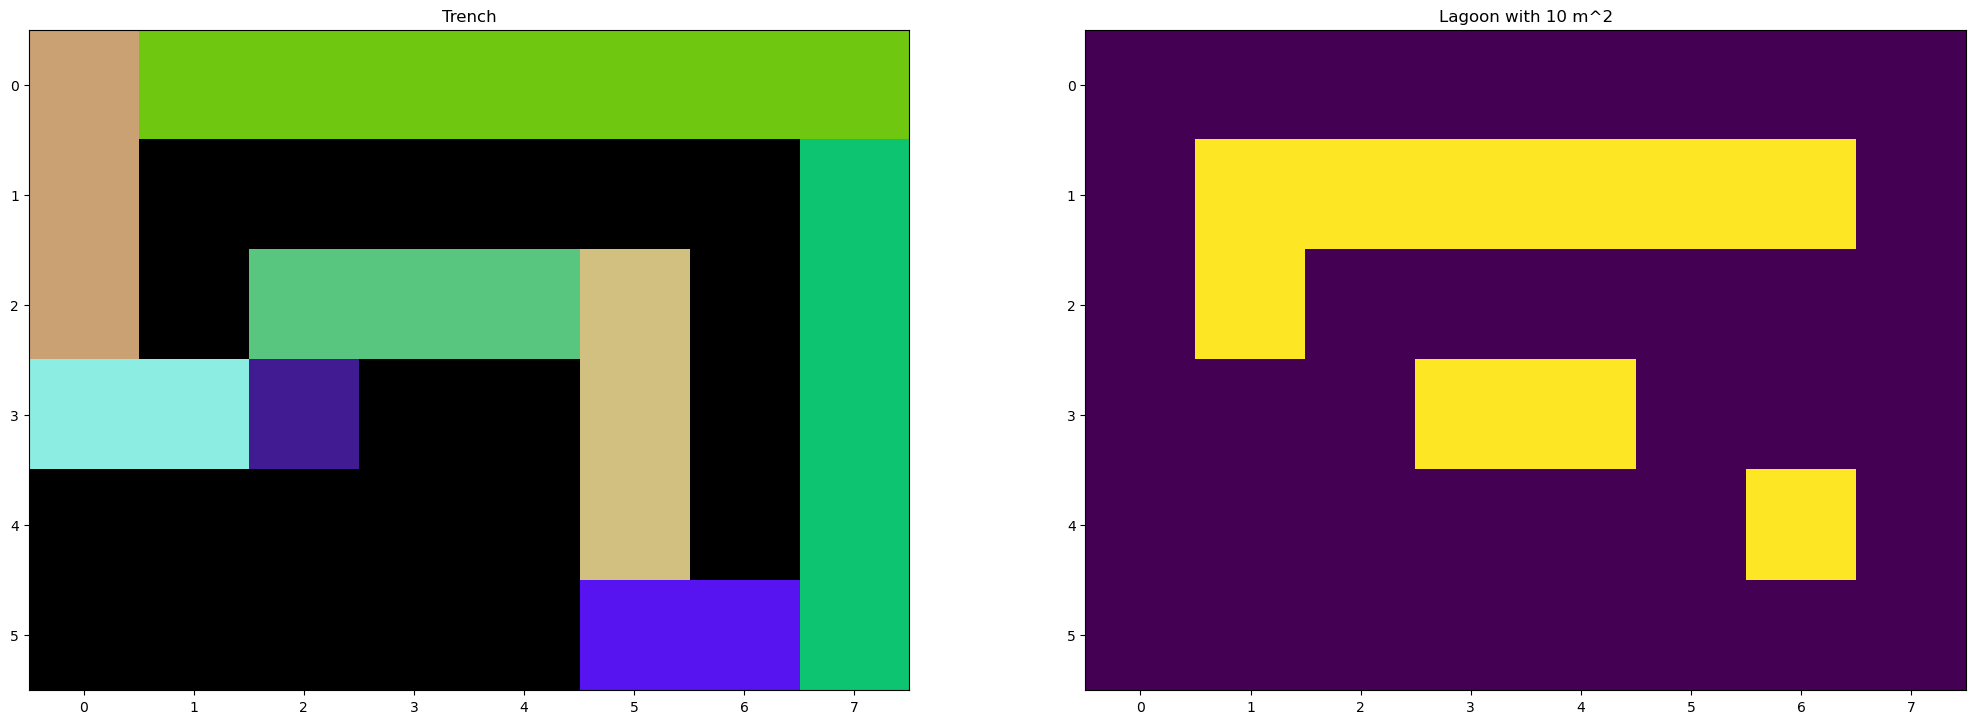

10

In [128]:
solve1(testdata)
solve1(testdata2)

(243, 271, 3)


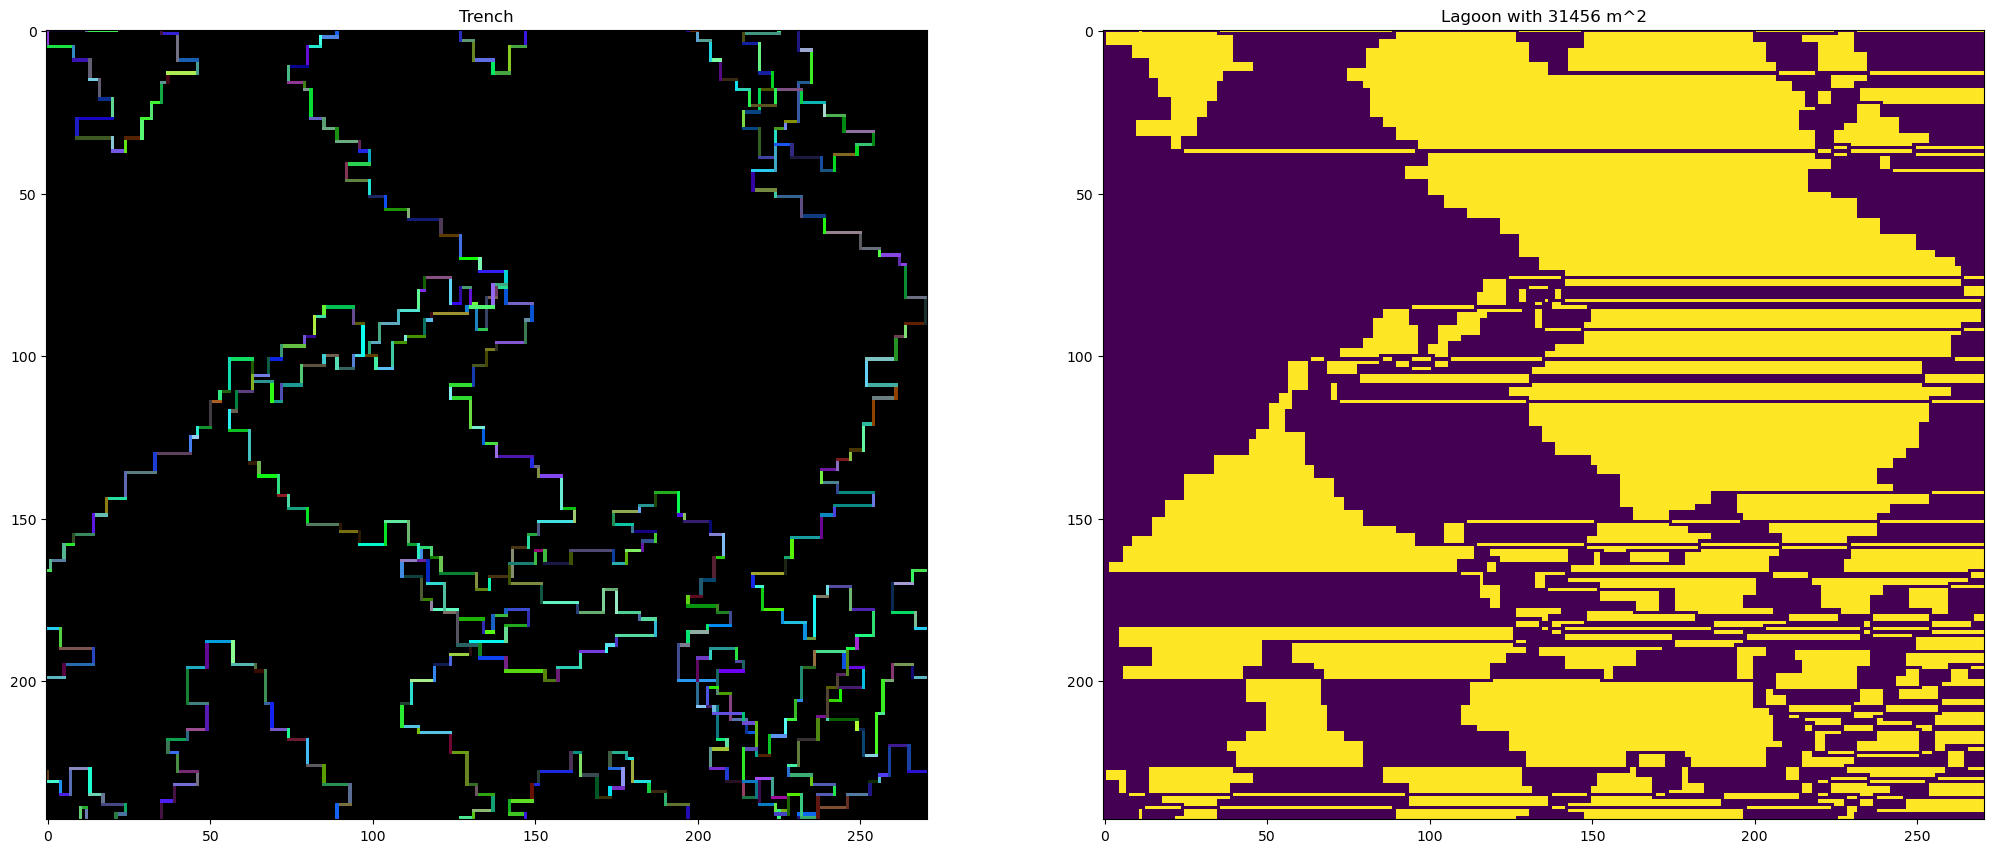

31456

In [129]:
solve1(data)